If you haven’t read readme.md, do it now please :)<br /><br />

Also, as far as this algorithm is concerned, I think [this guy](https://towardsdatascience.com/ml-from-scratch-logistic-and-softmax-regression-9f09f49a852c) did a masterful job explaining the code + he also wrote it in prettier manner than I did. What he didn't do though was he didn't explain exactly why cross entropy loss function becomes the binary log loss function if there are only two classes. This transition is quite simple if you think about it, but the first time I saw it I was surprised.

In [1]:
import numpy as np


t0, t1 = 5, 50

np.random.seed(42)


def standardize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])


def learning_schedule(t):
    return t0 / (t + t1)


def softmax(z):
    exp = np.exp(z - np.max(z)) # this subtraction part is covered in the blog post I'm linking above - it's for numerical stability

    return exp / np.sum(exp)


The cost function is as follows:<br />
$J(\theta) = -{1 \over m} \sum_{i=1}^m \sum_{k=1}^K y_{k}^i log(\hat{p}_{k}^i)$<br />
Now, the binary cross entropy loss function looks a bit different:<br />
$J(\theta) = -{1 \over m} \sum_{i=1}^m[y^i log(\hat{p^i}) + (1-y^i)log(1-\hat{p^i})]$<br />
Let's say we have three classes [0, 1, 2] and let's try expanding the first expression on those classes to see how it behaves:<br />
$J(\theta) = -{1 \over m} \sum_{i=1}^m(y_{0}^i log(\hat{p}_{0}^i) + y_{1}^i log(\hat{p}_{1}^i) + y_{2}^i log(\hat{p}_{2}^i)) $<br />
Easy - you sum the three expressions for the three classes. Now imagine you have only two classes: [0, 1]. The first's class ground truth is defined as $y_{0}$ and the score is defined as $log(\hat{p}_{0})$. The second's class ground truth can be defined as $1 - y_{0}$ and the score as $log(1- \hat_{p}_{0})$. Can you see it - first you multiply contents of the first class and add contents of the other defined in terms of "subtract the value from the first class expression from one".<br/>
 And here it is - a binary cross entropy function in disguised as multiclass cross entropy function :)

In [2]:
def softmax_regression(X, y, theta, epoch, batch_size):
    m = X.shape[0]
    random_idx = np.random.randint(X.shape[0] - batch_size)
    xi = X[random_idx:random_idx + batch_size + 1]
    yi = y[random_idx:random_idx + batch_size + 1]
    preds = softmax(xi.dot(theta))
    gradient = (1 / m) * xi.T.dot(preds - yi)
    eta = learning_schedule(epoch * xi.shape[0] + 1)

    return theta - eta * gradient

def predict(X, theta):
    z = X.dot(theta)

    return softmax(z)

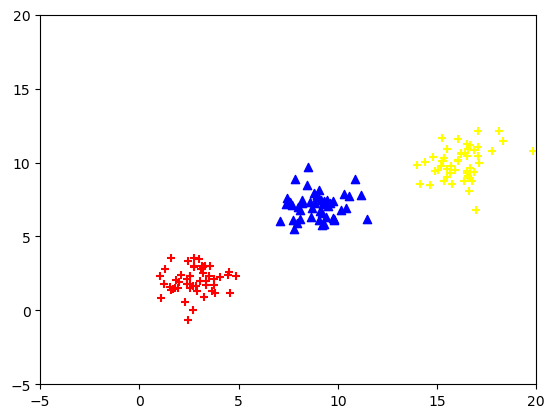

In [3]:
import matplotlib.pyplot as plt


x1 = np.random.normal(loc=3.0, size=50)
y1 = np.random.normal(loc=2.0, size=50)
x2 = np.random.normal(loc=9.0, size=50)
y2 = np.random.normal(loc=7.0, size=50)
x3 = np.random.normal(loc=16.0, size=50)
y3 = np.random.normal(loc=10.0, size=50)

plt.scatter(x1,y1,color='red', marker='+',s=35)
plt.scatter(x2,y2,color='blue', marker= '^',s=35)
plt.scatter(x3,y3,color='yellow', marker='+',s=35)
plt.xlim(-5,20)
plt.ylim(-5,20)
plt.show()

In [4]:
theta = np.zeros((2, 1))
n_epochs = 50
X = np.hstack((x1, x2, x3)).reshape(-1, 1)
shape = np.zeros([50, 3], dtype=int)
y1_true = np.full_like(shape, [1, 0, 0])
y2_true = np.full_like(shape, [0, 1, 0])
y3_true = np.full_like(shape, [0, 0, 1])
y = np.vstack((y1_true, y2_true, y3_true))
X_b = np.c_[np.ones((X.shape[0], 1)), X]
costs = []

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = softmax_regression(X_b, y, theta, epoch, 10)

In [5]:
predict(X, theta)

ValueError: shapes (150,1) and (2,3) not aligned: 1 (dim 1) != 2 (dim 0)